<a href="https://colab.research.google.com/github/JustmeLu/Tareas-automatizacionInicial/blob/main/2-Ejercicios/03-Agrupamiento-Jerarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/03-Agrupamiento-Jerarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Agrupamiento Jerarquico
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de agrupamiento jerárquico a un conjunto de datos.

Los paquetes necesarios son:

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np


---
## <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [11]:
# 1. Cargar el dataset
df = pd.read_csv("drug200.csv")

# 2. Seleccionar solo las variables predictoras (excluir 'Drug')
X = df.drop('Drug', axis=1)

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [12]:
#Descripción de los datos
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [17]:
# 2. Seleccionar solo las variables predictoras (se excluye 'Drug')
X = df.drop('Drug', axis=1)

# 3. Codificación One-Hot para variables categóricas
X_encoded = pd.get_dummies(X, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True)

# 4. Escalado de todas las variables (incluyendo las nuevas binarias)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)

# Ahora, 'X_scaled' es la matriz de datos numéricos
data = X_scaled

print(f"Dimensiones de los datos después del preprocesamiento: {data_for_clustering.shape}")

Dimensiones de los datos después del preprocesamiento: (200, 6)


---
## <font color='264CC7'> Dendograma </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Genera el dendograma de los datos.
<ul>
  <li>Usa diferentes métricas y funciones de enlace.</li>
  <li>Toma una distancia de corte.</li>
  <li>De manera intutiva, ¿por qué tomaste la métrica y la distancia de corte?</li>
</ul>
</div>

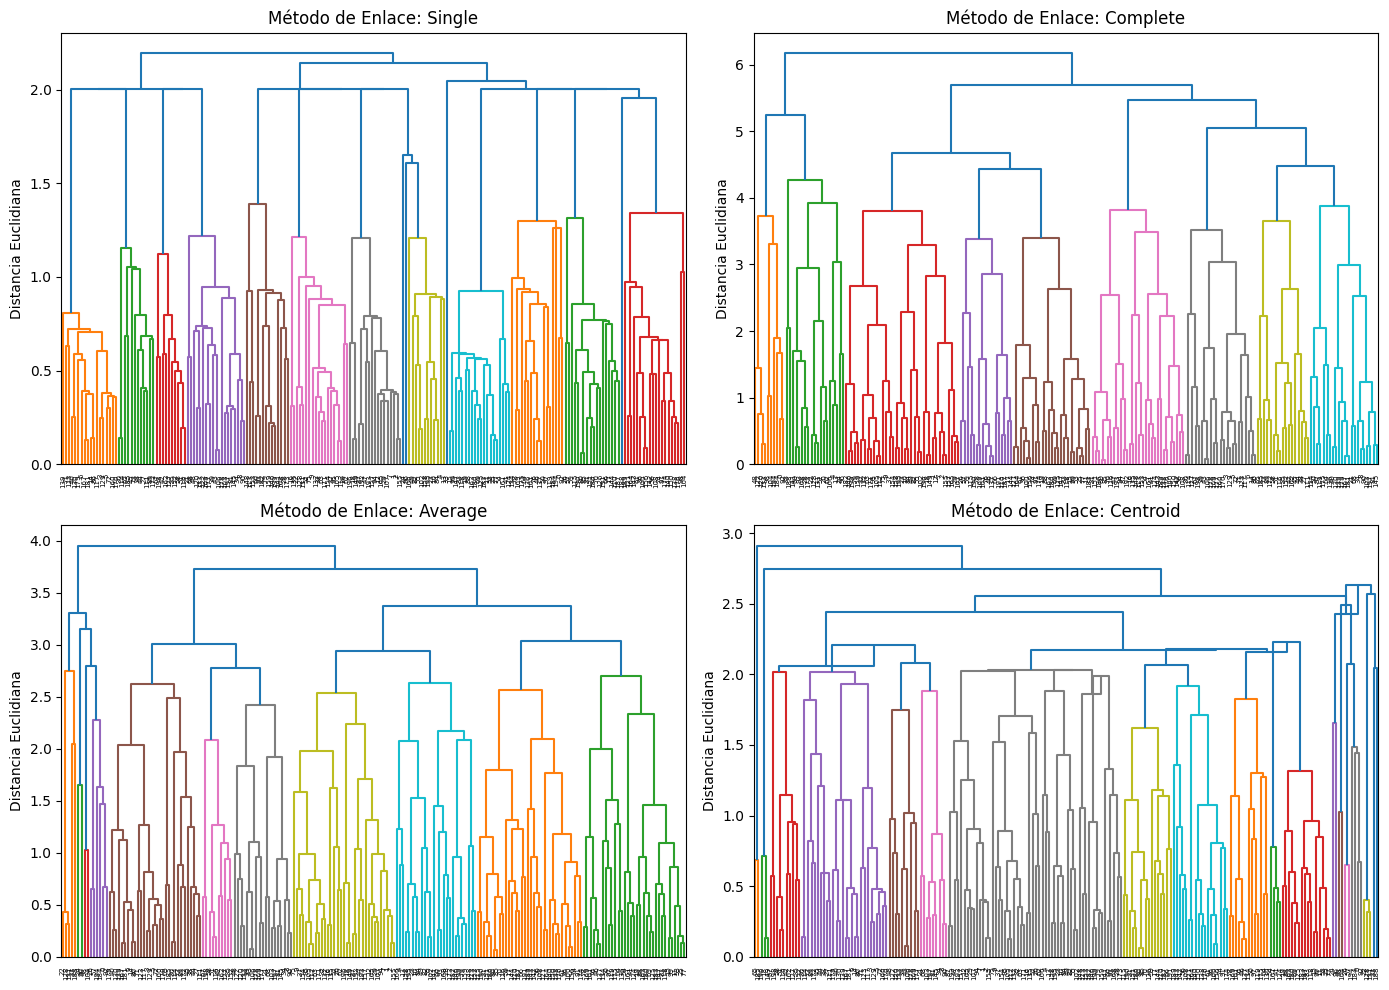

In [26]:

# Crear una figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()  # Convertir la matriz de ejes en una lista para iterar fácilmente

# Métodos de enlace
methods = ['single', 'complete', 'average', 'centroid']

# Generar dendrogramas en subplots
for i, method in enumerate(methods):
    # Generar la matriz de enlace
    linkage_matrix = linkage(data, method=method)

    # Generar el dendrograma
    dendrogram(linkage_matrix, ax=axes[i], labels=df.index.tolist(), p=30) # Truncamos para mejor visualización

    axes[i].set_title(f'Método de Enlace: {method.capitalize()}')
    axes[i].set_ylabel('Distancia Euclidiana')

# Ajustar el espacio entre subplots
plt.tight_layout()
plt.show()

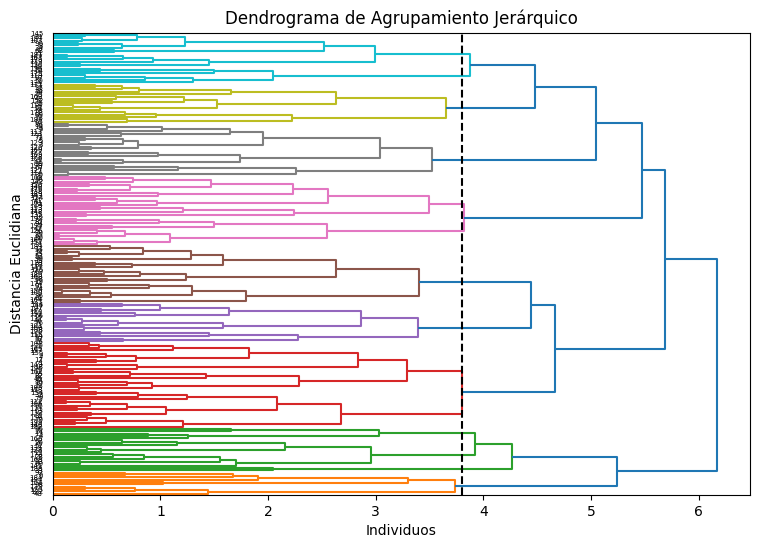

In [41]:
# Realizamos el clustering jerárquico
Z = linkage(data, method='complete')

# Definir la distancia de corte
distancia_corte = 3.8

# Calcular el dendrograma
plt.figure(figsize=(9, 6))
dendrogram(Z,
    orientation='right', )
plt.axvline(x=distancia_corte, c='k', ls='--')
plt.title("Dendrograma de Agrupamiento Jerárquico")
plt.xlabel("Individuos")
plt.ylabel("Distancia Euclidiana")
plt.show()

Se utilizó el método de enlace completo porque forma grupos más compactos y bien separados. Este método toma en cuenta la mayor distancia entre los individuos de dos grupos lo que evita unir pacientes muy diferentes en un mismo cluster, permite identificar perfiles de pacientes más homogéneos, lo que es importante para analizar qué medicamento puede ser más adecuado para cada grupo.
La distancia de corte se fijó alrededor de 3.8, ya que en este punto los grupos ya se ven mas definidos y aún no se mezclan perfiles que sean muy distintos.

---
## <font color='264CC7'> Asignación de grupos y análisis </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Revisa la media de cada grupo.</li>
  <li>Revisa el mínimo y máximo de cada grupo.</li>
  <li>Muestra algunos integrantes de cada grupo.</li>
</ul>
</div>

In [42]:
# Ahora asignamos las etiquetas de clúster
clusters = fcluster(Z, t=distancia_corte, criterion='distance')

# Agregar la información de clúster como C1, C2, C3, etc.
data['Cluster'] = ['C' + str(c) for c in clusters]

# Revisar los primeros registros
display(data.head())

NameError: name 'fcluster' is not defined

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>

---
## <font color='264CC7'> Visualizaciones  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
  <li>Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?</li>
</ul>
</div>

---
## <font color='264CC7'> Métricas  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>

---
## <font color='264CC7'> Iteraciones </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza el proceso de agrupamiento jerárquico con diferentes parámetros, analiza la métrica de la silueta de cada uno e indica cuál es el mejor.
</div>